<a href="https://colab.research.google.com/github/panagiwt10/CardioVasc-RiskCalculo/blob/main/testProjNovaMech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
pip install pydeseq2

In [284]:
# -*- coding: utf-8 -*-
# Φόρτωση βιβλιοθηκών
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import anndata as ad

count_data = pd.read_csv("GSE249925_20231208-For-GEO-Raw-Counts.tsv",sep='\t', encoding='utf-8', escapechar='\n', index_col=0)
count_data = count_data.drop(columns=['Length'])  # Αφαίρεση στήλης μήκους

# ----------------------------------------------------------
# ΒΗΜΑ 2: Φιλτράρισμα γονιδίων & δειγμάτων
# ----------------------------------------------------------

In [285]:
#κραταω γονιδια με count > 10
filtered_counts = count_data.loc[count_data.sum(axis=1) > 10, :]


# Αφαίρεση δειγμάτων με μηδενική διακύμανση
variances = filtered_counts.var(axis=0)
filtered_counts = filtered_counts.loc[:, variances > 0]

# ----------------------------------------------------------
# ΒΗΜΑ 3: Κανονικοποίηση με Z-score
# ----------------------------------------------------------

In [286]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_counts.T)

#ελεγχος ΝaΝ
print("NaNs μετά την κανονικοποίηση:", np.isnan(scaled_data).sum())
filter.shape[1] #αναφερομαστε στα δειγματα

NaNs μετά την κανονικοποίηση: 0


120

# ----------------------------------------------------------
# ΒΗΜΑ 4: PCA
# ----------------------------------------------------------

In [288]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=filtered_counts.columns)
pca_df

,PC1,PC2
10,14.404463,-72.539243
12_2_03__R,-25.947259,-1.986921
13,90.101993,-53.996560
14,-12.048662,-77.328033
17_11_02__R,-4.205852,-6.427701
...,...,...
RNM02,17.685455,-22.869690
RNM04,-39.241850,62.173402
RNM07,-84.394739,7.667293
RR607466_R,-32.780330,61.747418


# ----------------------------------------------------------
# ΒΗΜΑ 5: Boxplot Z-score
# ----------------------------------------------------------

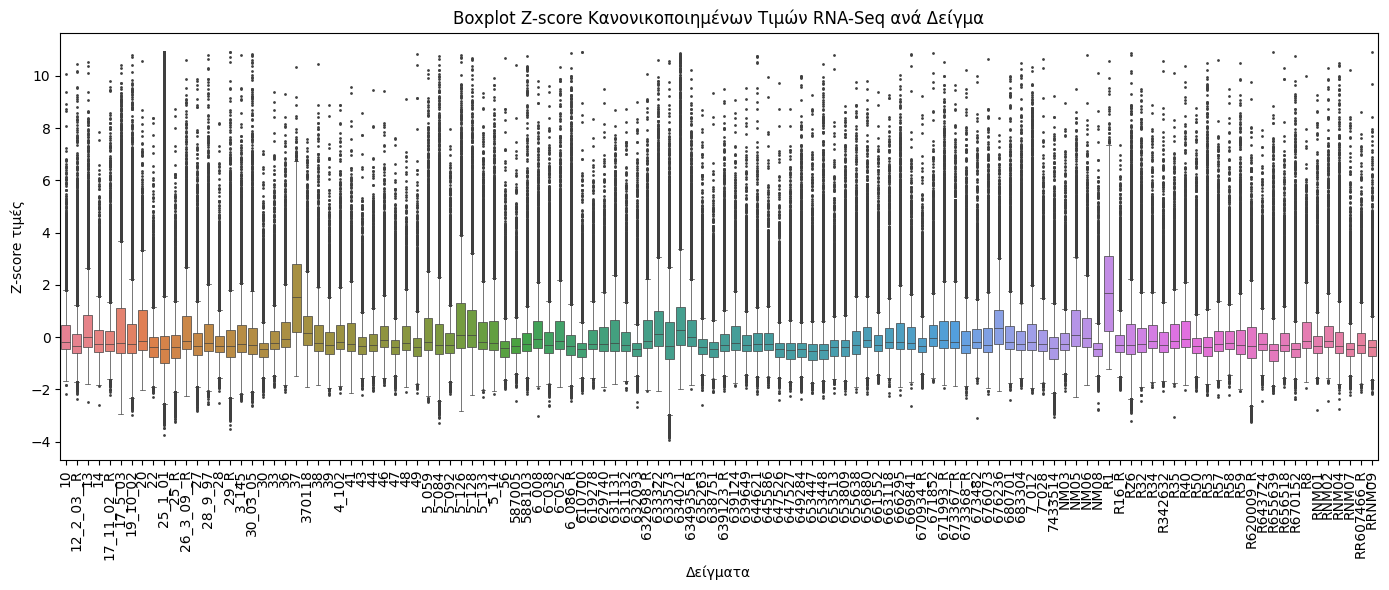

In [289]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=pd.DataFrame(scaled_data, index=filtered_counts.columns).T,
            fliersize=1, linewidth=0.5)
plt.title("Boxplot Z-score Κανονικοποιημένων Τιμών RNA-Seq ανά Δείγμα")
plt.ylabel("Z-score τιμές")
plt.xlabel("Δείγματα")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# ΒΗΜΑ 6: Πίνακας συσχέτισης & heatmap
# ----------------------------------------------------------

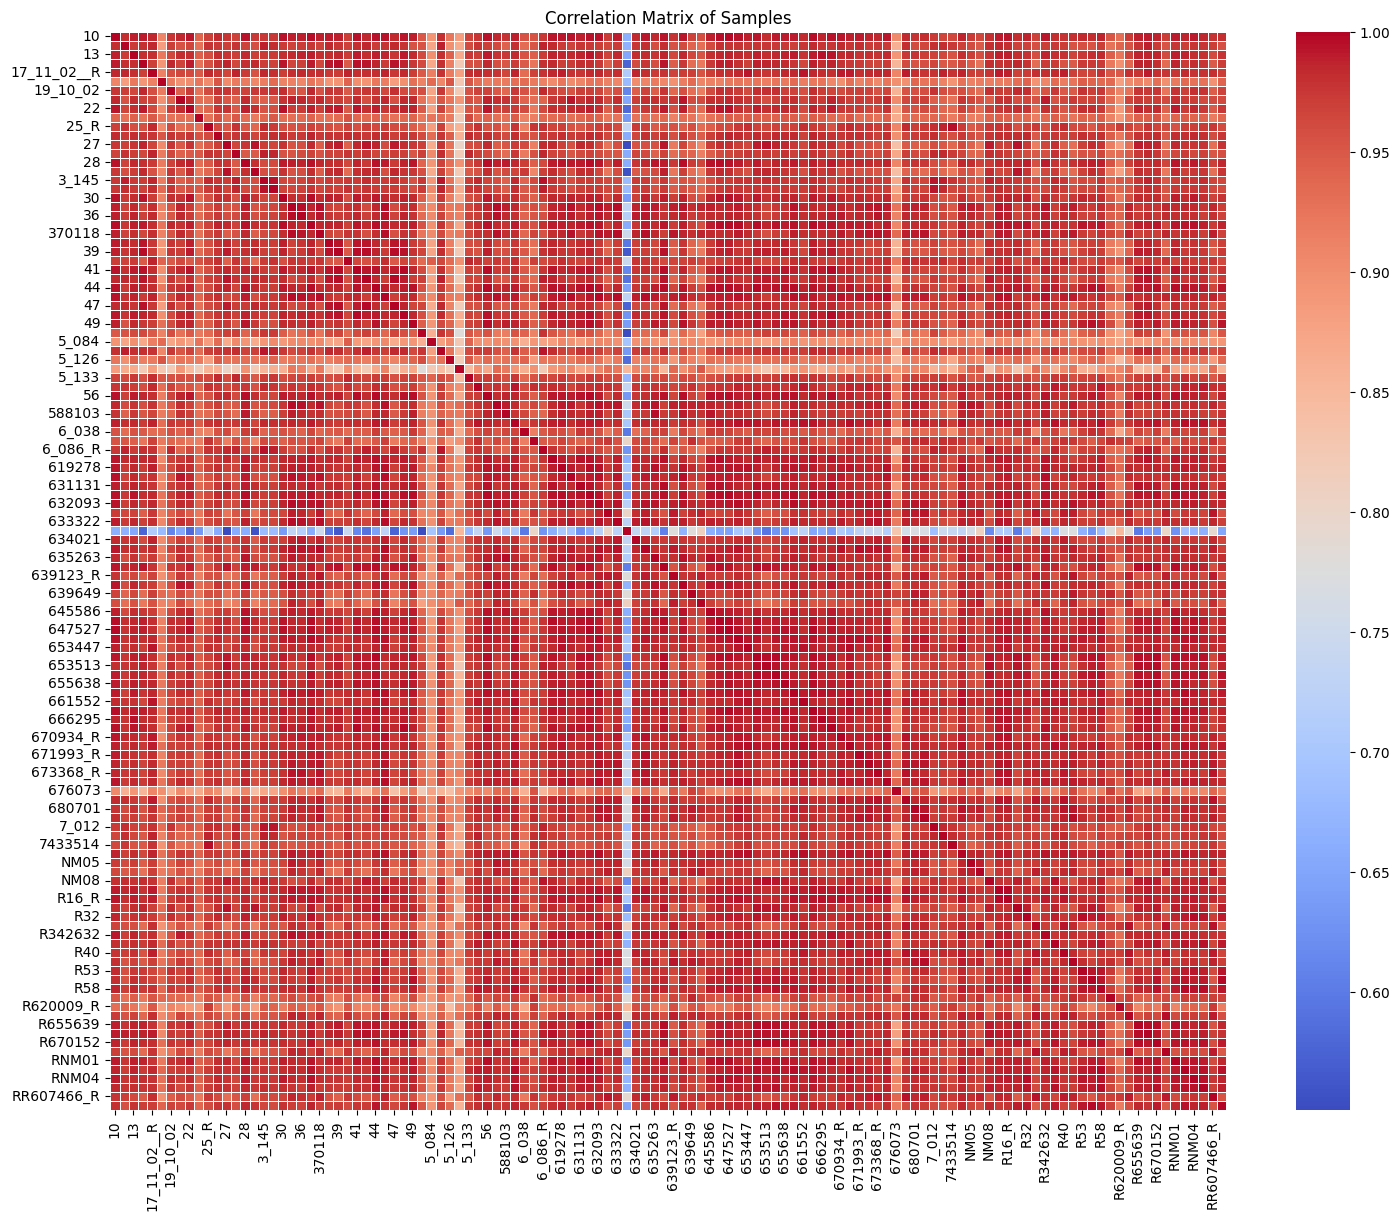

In [290]:
correlation_matrix = filtered_counts.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Samples")
plt.show()


In [291]:
filtered_counts.to_csv("filtered_gene_counts.csv")
print("Αποθηκεύτηκαν τα φιλτραρισμένα counts.")

Αποθηκεύτηκαν τα φιλτραρισμένα counts.


In [292]:
counts= pd.read_csv('filtered_gene_counts.csv')
counts

,Gene_Index,10,12_2_03__R,13,14,17_11_02__R,17_5_03,19_10_02,20,22,...,R655639,R656518,R670152,R8,RNM01,RNM02,RNM04,RNM07,RR607466_R,RRNM09
0,chr1@ENSG00000223972@DDX11L1@11869@14409,1,0,4,0,2,3,3,0,2,...,0,1,2,1,4,2,0,1,2,0
1,chr1@ENSG00000227232@WASH7P@14404@29570,78,68,70,55,130,214,121,52,33,...,70,62,56,145,85,84,107,90,141,73
2,chr1@ENSG00000278267@MIR6859-1@17369@17436,8,3,14,5,14,43,3,2,1,...,7,12,4,13,10,1,19,12,38,7
3,chr1@ENSG00000243485@MIR1302-11@29554@31109,1,0,1,0,0,0,0,0,0,...,0,0,3,0,1,0,0,0,0,0
4,chr1@ENSG00000237613@FAM138A@34554@36081,0,0,0,0,0,0,3,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38111,chrM@ENSG00000198695@MT-ND6@14149@14673,25222,29815,14018,31448,17866,11058,8527,36303,28545,...,24687,34528,11293,29182,21348,26935,22688,34256,13079,19422
38112,chrM@ENSG00000210194@MT-TE@14674@14742,744,998,473,803,574,302,99,1535,1125,...,901,1113,455,780,674,875,990,1030,522,730
38113,chrM@ENSG00000198727@MT-CYB@14747@15887,1021462,1052842,572634,1185783,830575,461370,960027,792812,992182,...,689117,920700,755214,751138,664781,706842,902955,708055,678134,719821
38114,chrM@ENSG00000210195@MT-TT@15888@15953,1000,1195,961,770,1101,982,143,588,908,...,1346,545,664,500,721,540,2278,1108,527,1835


In [295]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats


In [296]:
counts = pd.read_csv('filtered_gene_counts.csv', index_col=0)

# Εμφάνιση των πρώτων γραμμών για έλεγχο
print(counts.head())

                                             10  12_2_03__R  13  14  \
Gene_Index                                                            
chr1@ENSG00000223972@DDX11L1@11869@14409      1           0   4   0   
chr1@ENSG00000227232@WASH7P@14404@29570      78          68  70  55   
chr1@ENSG00000278267@MIR6859-1@17369@17436    8           3  14   5   
chr1@ENSG00000243485@MIR1302-11@29554@31109   1           0   1   0   
chr1@ENSG00000237613@FAM138A@34554@36081      0           0   0   0   

                                             17_11_02__R  17_5_03  19_10_02  \
Gene_Index                                                                    
chr1@ENSG00000223972@DDX11L1@11869@14409               2        3         3   
chr1@ENSG00000227232@WASH7P@14404@29570              130      214       121   
chr1@ENSG00000278267@MIR6859-1@17369@17436            14       43         3   
chr1@ENSG00000243485@MIR1302-11@29554@31109            0        0         0   
chr1@ENSG00000237613@FAM138A

In [297]:
metadata = pd.read_csv('SraRunTable.csv')
metadata


,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Collection_Date,Consent,...,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,tissue
0,SRR27178891,RNA-Seq,202,12683889868,PRJNA1051135,SAMN38766483,1741911326,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T13:03:00Z,1,GSM7967262,heart muscle,SRP477383,heart muscle
1,SRR27178892,RNA-Seq,202,14427879290,PRJNA1051135,SAMN38766484,2022684697,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T13:20:00Z,1,GSM7967261,heart muscle,SRP477383,heart muscle
2,SRR27178893,RNA-Seq,202,13836091202,PRJNA1051135,SAMN38766485,2012261975,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:25:00Z,1,GSM7967260,heart muscle,SRP477383,heart muscle
3,SRR27178894,RNA-Seq,202,11660727548,PRJNA1051135,SAMN38766486,1682724494,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:17:00Z,1,GSM7967259,heart muscle,SRP477383,heart muscle
4,SRR27178895,RNA-Seq,202,25607544444,PRJNA1051135,SAMN38766487,3627171589,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:17:00Z,1,GSM7967258,heart muscle,SRP477383,heart muscle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,SRR27179006,RNA-Seq,202,11383555672,PRJNA1051135,SAMN38766578,1664695350,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:37:00Z,1,GSM7967167,heart muscle,SRP477383,heart muscle
116,SRR27179007,RNA-Seq,202,13979812586,PRJNA1051135,SAMN38766579,1934868586,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T13:06:00Z,1,GSM7967166,heart muscle,SRP477383,heart muscle
117,SRR27179008,RNA-Seq,202,12842241304,PRJNA1051135,SAMN38766580,1892970366,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:31:00Z,1,GSM7967165,heart muscle,SRP477383,heart muscle
118,SRR27179009,RNA-Seq,202,12381836036,PRJNA1051135,SAMN38766581,1760095228,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:17:00Z,1,GSM7967164,heart muscle,SRP477383,heart muscle


In [298]:
# Step 3: Δημιουργία AnnData
adata = ad.AnnData(X=counts.T)  # Transpose: samples x genes
adata.obs = metadata.copy()

adata
adata.obs

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Collection_Date,Consent,...,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,tissue
0,SRR27178891,RNA-Seq,202,12683889868,PRJNA1051135,SAMN38766483,1741911326,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T13:03:00Z,1,GSM7967262,heart muscle,SRP477383,heart muscle
1,SRR27178892,RNA-Seq,202,14427879290,PRJNA1051135,SAMN38766484,2022684697,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T13:20:00Z,1,GSM7967261,heart muscle,SRP477383,heart muscle
2,SRR27178893,RNA-Seq,202,13836091202,PRJNA1051135,SAMN38766485,2012261975,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:25:00Z,1,GSM7967260,heart muscle,SRP477383,heart muscle
3,SRR27178894,RNA-Seq,202,11660727548,PRJNA1051135,SAMN38766486,1682724494,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:17:00Z,1,GSM7967259,heart muscle,SRP477383,heart muscle
4,SRR27178895,RNA-Seq,202,25607544444,PRJNA1051135,SAMN38766487,3627171589,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:17:00Z,1,GSM7967258,heart muscle,SRP477383,heart muscle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,SRR27179006,RNA-Seq,202,11383555672,PRJNA1051135,SAMN38766578,1664695350,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:37:00Z,1,GSM7967167,heart muscle,SRP477383,heart muscle
116,SRR27179007,RNA-Seq,202,13979812586,PRJNA1051135,SAMN38766579,1934868586,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T13:06:00Z,1,GSM7967166,heart muscle,SRP477383,heart muscle
117,SRR27179008,RNA-Seq,202,12842241304,PRJNA1051135,SAMN38766580,1892970366,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:31:00Z,1,GSM7967165,heart muscle,SRP477383,heart muscle
118,SRR27179009,RNA-Seq,202,12381836036,PRJNA1051135,SAMN38766581,1760095228,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:17:00Z,1,GSM7967164,heart muscle,SRP477383,heart muscle


In [299]:
meta = metadata[["Run", "tissue"]].set_index("Run")
meta = metadata.rename(columns={"tissue": "condition"})

meta
metadata = metadata.set_index('Group')
metadata

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Collection_Date,Consent,...,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,tissue
Group,,,,,,,,,,,,,,,,,,,,,
HCM,SRR27178891,RNA-Seq,202,12683889868,PRJNA1051135,SAMN38766483,1741911326,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T13:03:00Z,1,GSM7967262,heart muscle,SRP477383,heart muscle
HCM,SRR27178892,RNA-Seq,202,14427879290,PRJNA1051135,SAMN38766484,2022684697,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T13:20:00Z,1,GSM7967261,heart muscle,SRP477383,heart muscle
HCM,SRR27178893,RNA-Seq,202,13836091202,PRJNA1051135,SAMN38766485,2012261975,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:25:00Z,1,GSM7967260,heart muscle,SRP477383,heart muscle
HCM,SRR27178894,RNA-Seq,202,11660727548,PRJNA1051135,SAMN38766486,1682724494,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:17:00Z,1,GSM7967259,heart muscle,SRP477383,heart muscle
HCM,SRR27178895,RNA-Seq,202,25607544444,PRJNA1051135,SAMN38766487,3627171589,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:17:00Z,1,GSM7967258,heart muscle,SRP477383,heart muscle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCM,SRR27179006,RNA-Seq,202,11383555672,PRJNA1051135,SAMN38766578,1664695350,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:37:00Z,1,GSM7967167,heart muscle,SRP477383,heart muscle
HCM,SRR27179007,RNA-Seq,202,13979812586,PRJNA1051135,SAMN38766579,1934868586,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T13:06:00Z,1,GSM7967166,heart muscle,SRP477383,heart muscle
HCM,SRR27179008,RNA-Seq,202,12842241304,PRJNA1051135,SAMN38766580,1892970366,"QUANTITATIVE HEALTH SCIENCES RESEARCH, MAYO CL...",missing,public,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-11-12T00:00:00Z,2023-12-13T12:31:00Z,1,GSM7967165,heart muscle,SRP477383,heart muscle


In [ ]:
dds = DeseqDataSet(
    adata=adata,
    design_factors="Group",
    ref_level="control"
)
dds.deseq2()


/tmp/ipython-input-300-910800941.py:1: DeprecationWarning: ref_level is deprecated and no longer has any effect. It will beremoved in a future release.
  dds = DeseqDataSet(
/tmp/ipython-input-300-910800941.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.29 seconds.

Fitting dispersions...
... done in 65.11 seconds.

Fitting dispersion trend curve...
... done in 1.19 seconds.

Fitting MAP dispersions...
... done in 72.49 seconds.

Fitting LFCs...


In [ ]:
import pandas as pd
import numpy as np
import anndata as ad
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStat

Step 1: Φόρτωση των δεδομένων γονιδιακής έκφρασης


In [ ]:
counts = pd.read_csv('filtered_gene_counts.csv', index_col=0)
print(counts.head())  # Εμφάνιση των πρώτων γραμμών για έλεγχο

Step 2: Φόρτωση των μεταδεδομένων

In [ ]:
metadata = pd.read_csv('SraRunTable.csv')
print(metadata.head())  # Εμφάνιση των πρώτων γραμμών για έλεγχο

 Step 3: Δημιουργία AnnData (μετάθεση για δείγματα ως στήλες)


In [ ]:
adata = ad.AnnData(X=counts.T)  # Transpose: δείγματα ως στήλες, γονίδια ως γραμμές
adata.obs = metadata.copy()

Step 4: Δημιουργία και ορισμός της στήλης 'condition' από τη στήλη 'Group'

In [ ]:
# Step 4: Δημιουργία και ορισμός της στήλης 'condition' από τη στήλη 'Group'
meta = metadata[["Run", "Group"]].set_index("Run")  # Απομονώνουμε μόνο τα 'Run' και 'Group'
meta = meta.rename(columns={"Group": "condition"})  # Αντικαθιστούμε 'Group' με 'condition'
adata.obs = meta.copy()  # Ενημερώνουμε τα μεταδεδομένα στο AnnData

In [ ]:
dds = DeseqDataSet(
    adata=adata,
    design_factors="condition",
    ref_level="Control"  # Ορίζουμε την ομάδα 'control' ως αναφορά
)

In [ ]:
# Step 6: Εκτέλεση της ανάλυσης DESeq2
dds.deseq2()

In [ ]:
# Step 7: Δημιουργία και εξαγωγή των αποτελεσμάτων
stat_res = DeseqStats(
    dds,
    contrast=["condition", "HCM", "Control"]  # Σύγκριση μεταξύ "treated" και "control"
)

In [ ]:
# Εμφάνιση των αποτελεσμάτων
stat_res.summary()

In [ ]:
# Εξαγωγή των αποτελεσμάτων σε dataframe
results_df = stat_res.results_df
print(results_df)


                                             10  12_2_03__R  13  14  \
Gene_Index                                                            
chr1@ENSG00000223972@DDX11L1@11869@14409      1           0   4   0   
chr1@ENSG00000227232@WASH7P@14404@29570      78          68  70  55   
chr1@ENSG00000278267@MIR6859-1@17369@17436    8           3  14   5   
chr1@ENSG00000243485@MIR1302-11@29554@31109   1           0   1   0   
chr1@ENSG00000237613@FAM138A@34554@36081      0           0   0   0   

                                             17_11_02__R  17_5_03  19_10_02  \
Gene_Index                                                                    
chr1@ENSG00000223972@DDX11L1@11869@14409               2        3         3   
chr1@ENSG00000227232@WASH7P@14404@29570              130      214       121   
chr1@ENSG00000278267@MIR6859-1@17369@17436            14       43         3   
chr1@ENSG00000243485@MIR1302-11@29554@31109            0        0         0   
chr1@ENSG00000237613@FAM138A

/tmp/ipython-input-272-303030391.py:26: DeprecationWarning: ref_level is deprecated and no longer has any effect. It will beremoved in a future release.
  dds = DeseqDataSet(
/tmp/ipython-input-272-303030391.py:26: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.28 seconds.

Fitting dispersions...
... done in 68.46 seconds.

Fitting dispersion trend curve...
... done in 1.19 seconds.

Fitting MAP dispersions...
... done in 74.91 seconds.

Fitting LFCs...
... done in 40.44 seconds.

Calculating cook's distance...
... done in 0.46 seconds.

Replacing 957 outlier genes.

Fitting dispersions...
... done in 1.64 seconds.

Fitting MAP dispersions...
... done in 1.65 seconds.

Fitting LFCs...
... done in 0.99 seconds.

Running Wald tests...
... done in 11.70 seconds.



Log2 fold change & Wald test p-value: condition HCM vs Control
                                                  baseMean  log2FoldChange  \
Gene_Index                                                                   
chr1@ENSG00000223972@DDX11L1@11869@14409          1.993623        0.284630   
chr1@ENSG00000227232@WASH7P@14404@29570         107.099414        0.316755   
chr1@ENSG00000278267@MIR6859-1@17369@17436       15.240080        0.384335   
chr1@ENSG00000243485@MIR1302-11@29554@31109       0.239645        0.447698   
chr1@ENSG00000237613@FAM138A@34554@36081          0.270580        0.017115   
...                                                    ...             ...   
chrM@ENSG00000198695@MT-ND6@14149@14673       23234.818236       -0.272984   
chrM@ENSG00000210194@MT-TE@14674@14742          804.781881       -0.311278   
chrM@ENSG00000198727@MT-CYB@14747@15887      799622.794357       -0.146252   
chrM@ENSG00000210195@MT-TT@15888@15953         1044.728518       -0.071789   
c

In [ ]:
results_df.to_csv("DESeq2_results.csv")